# **IMPORTS**

In [1]:
!pip install comet_ml

     |████████████████████████████████| 215kB 2.6MB/s 
     |████████████████████████████████| 419kB 4.4MB/s 
     |████████████████████████████████| 204kB 6.3MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34546 sha256=e5d2a5250bc8ce772eab8ffe44f279cb37cd7c7a5b8cec99559eee48e727691c
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [142]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from numpy import arange
import seaborn as sns

import re
import spacy.cli
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score


from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud, STOPWORDS

In [3]:
spacy.cli.download('en_core_web_sm')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = nltk.corpus.stopwords.words('english')
nlp = spacy.load('en_core_web_sm')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# **LOADING** **DATA**

In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/odlymoon/Final/master/Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/odlymoon/Final/master/Test.csv")

In [5]:
sample = pd.read_csv("https://raw.githubusercontent.com/odlymoon/Final/master/SampleSubmission.csv")

# **VIEW** **DATA** 

In [98]:
print("Train\n")
print(train.head(5))
print("\nTest")
print(test.head(5))
print("\n(Datasets were imported correctly)")

Train

   tweet_id  ... agreement
0  CL1KWCMY  ...       1.0
1  E3303EME  ...       1.0
2  M4IVFSMS  ...       1.0
3  1DR6ROZ4  ...       1.0
4  J77ENIIE  ...       1.0

[5 rows x 4 columns]

Test
   tweet_id                                          safe_text
0  00BHHHP1  user user amp CARDINAL vaccine give CARDINAL h...
1  00UNMD0E  Students starting school without whooping coug...
2  01AXPTJF  I 'm kinda every ep < user > `` ripped headlin...
3  01HOEQJW  How many innocent children die lack vaccinatio...
4  01JUKMAO  CDC eyeing bird flu vaccine humans , though ri...

(Datasets were imported correctly)


# **Preprocessing**

In [102]:
def text(df):
    a = 0
    for tweet in df['safe_text']:
      tweet = tweet.lower()
      tweet = re.sub(r'http\S+', 'LINK', tweet)
      tweet = re.sub(r'@\S+', 'USER_REF', tweet)
      tweet = re.sub(r'[^\w\s]', '', tweet)
      tweet = tweet.lstrip()
      tweet = tweet.rstrip()
      tweet = tweet.replace('  ', ' ')
      df.loc[a, 'safe_text'] = tweet
      a += 1

      return df

In [103]:
text(train)

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,amp big homie meanboy3000 meanboy mb mbs mmr s...,0.0,1.000000
1,E3303EME,I 'm 100 % thinking devoting career proving au...,1.0,1.000000
2,M4IVFSMS,"# whatcausesautism VACCINES , DO NOT VACCINATE...",-1.0,1.000000
3,1DR6ROZ4,I mean immunize kid something wo n't secretly ...,-1.0,1.000000
4,J77ENIIE,Thanks < user > Catch performing La Nuit NYC 1...,0.0,1.000000
...,...,...,...,...
9996,IU0TIJDI,Living time sperm I used waste Jenny McCarthy ...,1.0,1.000000
9997,WKKPCJY6,"< user > < user > In spite measles outbreaks ,...",1.0,0.666667
9998,ST3A265H,Interesting trends child immunization Oklahoma...,0.0,1.000000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000


In [112]:
def entitie(df):
    df_index = 0

    for tweet in df['safe_text']:
      tweet = nlp(tweet)

      for entity in tweet.ents:
        df.loc[df_index, 'safe_text'] = df.loc[df_index, 'safe_text'].replace(str(entity.text), str(entity.label_))

      df_index += 1

      return df

In [114]:
entitie(train)

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,amp big homie meanboy3000 meanboy mb mbs mmr s...,0.0,1.000000
1,E3303EME,I 'm 100 % thinking devoting career proving au...,1.0,1.000000
2,M4IVFSMS,"# whatcausesautism VACCINES , DO NOT VACCINATE...",-1.0,1.000000
3,1DR6ROZ4,I mean immunize kid something wo n't secretly ...,-1.0,1.000000
4,J77ENIIE,Thanks < user > Catch performing La Nuit NYC 1...,0.0,1.000000
...,...,...,...,...
9996,IU0TIJDI,Living time sperm I used waste Jenny McCarthy ...,1.0,1.000000
9997,WKKPCJY6,"< user > < user > In spite measles outbreaks ,...",1.0,0.666667
9998,ST3A265H,Interesting trends child immunization Oklahoma...,0.0,1.000000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000


In [117]:
def lem(df):
    df_index = 0

    for tweet in df['safe_text']:
      tweet = nlp(tweet)
      
      for token in tweet:
        df.loc[df_index, 'safe_text'] = df.loc[df_index, 'safe_text'].replace(str(token.text), str(token.lemma_))

      df_index += 1

      return df

In [118]:
lem(train)

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,amp big homie meanboy3000 meanboy mb mbs mmr s...,0.0,1.000000
1,E3303EME,I 'm 100 % thinking devoting career proving au...,1.0,1.000000
2,M4IVFSMS,"# whatcausesautism VACCINES , DO NOT VACCINATE...",-1.0,1.000000
3,1DR6ROZ4,I mean immunize kid something wo n't secretly ...,-1.0,1.000000
4,J77ENIIE,Thanks < user > Catch performing La Nuit NYC 1...,0.0,1.000000
...,...,...,...,...
9996,IU0TIJDI,Living time sperm I used waste Jenny McCarthy ...,1.0,1.000000
9997,WKKPCJY6,"< user > < user > In spite measles outbreaks ,...",1.0,0.666667
9998,ST3A265H,Interesting trends child immunization Oklahoma...,0.0,1.000000
9999,6Z27IJGD,CDC Says Measles Are At Highest Levels In Deca...,0.0,1.000000


In [120]:
#runing preprocessing functions on test data
test[['safe_text']] = test[['safe_text']].astype(str)

In [121]:
text(test)
entitie(test)
lem(test)

,tweet_id,safe_text
0,00BHHHP1,user user amp cardinal vaccine give cardinal h...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,I 'm kinda every ep < user > `` ripped headlin...
3,01HOEQJW,How many innocent children die lack vaccinatio...
4,01JUKMAO,"CDC eyeing bird flu vaccine humans , though ri..."
...,...,...
5172,ZXVVNC5O,jenny mccarthy new years rockin eve . done lat...
5173,ZYIANVI8,Measles reported Clark Co. 1st time since 2011...
5174,ZYITEHAH,< user > issues alert regarding Measles TX . K...
5175,ZZ3BMBTG,I ca n't believe people n't vaccinate kids ! I...


In [123]:
train.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    1
dtype: int64

In [124]:
test.isnull().sum()

tweet_id     0
safe_text    0
dtype: int64

In [125]:
train.dropna(thresh=3, inplace=True)

In [126]:
train.label.value_counts()

 0.0    4908
 1.0    4054
-1.0    1038
Name: label, dtype: int64

# **EDA**

In [135]:
sum_df = train[['label', 'safe_text',]].groupby('label').count()
sum_df

,safe_text
label,
-1.0,1038
0.0,4908
1.0,4054


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


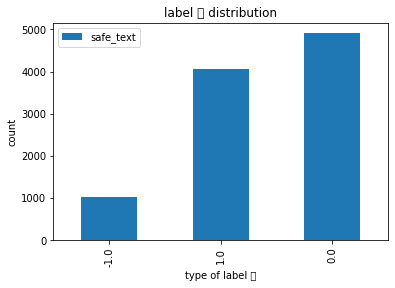

In [138]:
sum_df.sort_values('safe_text', ascending=True).plot(kind='bar')
plt.title('label 	 distribution')
plt.ylabel('count')
plt.xlabel('type of label 	')
plt.show()

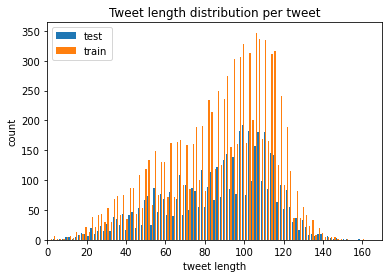

In [140]:
# Explore the word count and tweet lengths
train['length'] = train['safe_text'].astype(str).apply(len)
train['word_count'] = train['safe_text'].apply(lambda x: len(str(x).split()))
test['length'] = test['safe_text'].astype(str).apply(len)
test['word_count'] = test['safe_text'].apply(lambda x: len(str(x).split()))

# Creating the plot
plt.hist([test['length'], train['length']], bins=100, label=['test', 'train'])
plt.title('Tweet length distribution per tweet')
plt.xlabel('tweet length')
plt.ylabel('count')
plt.legend(loc='upper left')
plt.xlim([0,170])
plt.show()

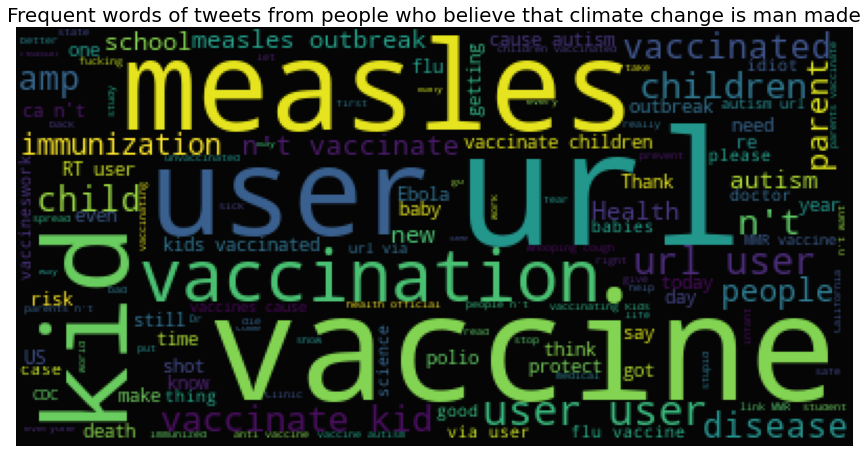

In [143]:
# Creating the word cloud
rnd_comments = train[train['label']==1].sample(n=2000)['safe_text'].values
wc = WordCloud(background_color='black', max_words=2000, stopwords=STOPWORDS)
wc.generate(''.join(rnd_comments))

# Plotting the word cloud
plt.figure(figsize=(15,10))
plt.axis('off')
plt.title('Frequent words of tweets from people who believe that climate change is man made', fontsize=20)
plt.imshow(wc.recolor(colormap='viridis', random_state=17), alpha=0.98)
plt.show()

# **Declare** **models**

In [139]:
X_train = train['safe_text']
X_train

0        amp big homie meanboy3000 meanboy mb mbs mmr s...
1        I 'm 100 % thinking devoting career proving au...
2        # whatcausesautism VACCINES , DO NOT VACCINATE...
3        I mean immunize kid something wo n't secretly ...
4        Thanks < user > Catch performing La Nuit NYC 1...
                               ...                        
9996     Living time sperm I used waste Jenny McCarthy ...
9997     < user > < user > In spite measles outbreaks ,...
9998     Interesting trends child immunization Oklahoma...
9999     CDC Says Measles Are At Highest Levels In Deca...
10000    Pneumonia vaccine : women w risk pulmonary dis...
Name: safe_text, Length: 10000, dtype: object

In [130]:
y_train = train['label']
y_train

0        0.0
1        1.0
2       -1.0
3       -1.0
4        0.0
        ... 
9996     1.0
9997     1.0
9998     0.0
9999     0.0
10000    1.0
Name: label, Length: 10000, dtype: float64

In [25]:
X_test = test['safe_text']
X_test

0       user user amp CARDINAL vaccine give CARDINAL h...
1       Students starting school without whooping coug...
2       I 'm kinda every ep < user > `` ripped headlin...
3       How many innocent children die lack vaccinatio...
4       CDC eyeing bird flu vaccine humans , though ri...
                              ...                        
5172    jenny mccarthy new years rockin eve . done lat...
5173    Measles reported Clark Co. 1st time since 2011...
5174    < user > issues alert regarding Measles TX . K...
5175    I ca n't believe people n't vaccinate kids ! I...
5176    `` < user > Alternatives # Flu Vaccine < url >...
Name: safe_text, Length: 5177, dtype: object

In [26]:
vectorizer = TfidfVectorizer(lowercase=True,
                            stop_words='english',
                            ngram_range=(1, 2))

X_train = vectorizer.fit_transform(X_train)

In [92]:
linear_svc = LogisticRegression()

In [93]:
linear_svc.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [94]:
X_test = vectorizer.transform(X_test)

AttributeError: ignored

In [74]:
y_pred_linearsvc = linear_svc.predict(X_test)

Imporving models

In [75]:
#creating variables for the various sentiments
Pro = train[train['safe_text']==1]
Neutral = train[train['safe_text']==0]
Anti = train[train['safe_text']==-1]

In [76]:
from sklearn.utils import resample

In [77]:
# Downsampling the majority Neutral', 'Pro', 'Anti
downsampled_anti = resample(Pro,
                    replace=True, 
                    n_samples=len(Anti), 
                    random_state=42) 

downsampled_neutral = resample(Neutral,
                    replace=True, 
                    n_samples=len(Anti), 
                    random_state=42)

# Combine downsampled majority class with minority class
downsampled = pd.concat([downsampled_anti, downsampled_neutral, Anti])

In [78]:
print('The distribution of samples before upsampling:')
print(train['label'].value_counts())

The distribution of samples before upsampling:
 0.0    4908
 1.0    4054
-1.0    1038
Name: label, dtype: int64


In [79]:
# Check new class counts
print('The distribution of samples after upsampling:')
print(downsampled['label'].value_counts())

The distribution of samples after upsampling:
Series([], Name: label, dtype: int64)


In [83]:
# Create dictionaries for the data we want to log

params = {"preprocessing":  "_preprocess(df)",
          "keeps username":"True",
          "keeps hashtags":"True",
          "keeps URL":"urlweb",
          "removes puncutation":"string punctuation",
          "use stopwords":"False",
          "model_type": "LinearSVC",
          }

In [86]:
from comet_ml import Experiment

submition notebook

In [67]:


submit_lsvc = test.copy()
submit_lsvc.drop(columns=['safe_text'], inplace=True)
submit_lsvc['label'] = y_pred_linearsvc

submit_lsvc['label'] = submit_lsvc['label'].astype(int)
submit_lsvc = submit_lsvc.set_index('tweet_id')

In [68]:
submit_lsvc.head()

,label
tweet_id,
00BHHHP1,1
00UNMD0E,1
01AXPTJF,0
01HOEQJW,1
01JUKMAO,0


In [69]:
submit_lsvc.to_csv('Tendi7.csv')